In [1]:
from pycalphad import Database, Model, calculate, variables as v

# Calculation Settings
dbf = Database('alfe_sei.TDB')
comps = ['AL', 'FE', 'VA']
phase_name = 'B2_BCC'
output = 'SM'
endmember = [[0.3, 0.7, 0.6, 0.4, 1.0]]
temp_range = [300, 1600]

mod = Model(dbf, comps, phase_name)
print(mod.contributions)
contributions = mod.models.copy()
results = {}

for contribution, value in contributions.items():
    mod.models.clear()
    mod.models[contribution] = value
    result = calculate(dbf, comps, phase_name,
                       model={phase_name: mod}, output=output, points=endmember, T=(temp_range[0], temp_range[1], 5), P=1e5)
    if (getattr(result, output) == 0).all():
        continue
    results[contribution] = getattr(result, output)

[('ref', 'reference_energy'), ('idmix', 'ideal_mixing_energy'), ('xsmix', 'excess_mixing_energy'), ('mag', 'magnetic_energy'), ('2st', 'twostate_energy'), ('ein', 'einstein_energy'), ('ord', 'atomic_ordering_energy')]


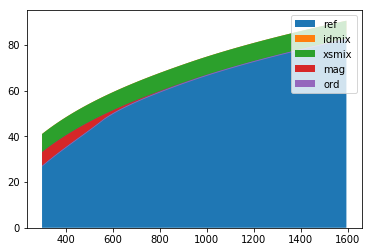

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = []
values = []
for contribution in results.keys():
    labels.append(contribution)
    values.append(results[contribution].values.flatten())

plt.stackplot(results['ref']['T'], *values,
              labels=labels, baseline='zero')
plt.legend(loc='best')